In [ ]:
from google.colab import auth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc=gspread.authorize(creds)
worksheet = gc.open('DL-01').sheet1
data=worksheet.get_all_values()

In [ ]:
dataset1=pd.DataFrame(data[1:], columns=data[0])
dataset1=dataset1.astype({'x':'float'})
dataset1=dataset1.astype({'y':'float'})
dataset1
x=dataset1[['x']].values
y=dataset1[['y']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train1=Scaler.transform(x_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11523.5908
Epoch 2/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11519.5518
Epoch 3/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11516.6514
Epoch 4/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11514.2334
Epoch 5/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11512.1055
Epoch 6/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11510.1670
Epoch 7/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11508.3799
Epoch 8/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11506.7188
Epoch 9/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11505.1514
Epoch 10/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11503.6689
Epoch 11/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11502.2695
Epoch 12/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11500.8955
Epoch 13/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11499.5508
Epoch 14/1997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11498.2773
Epoch 15/1997
1/1

<Axes: >

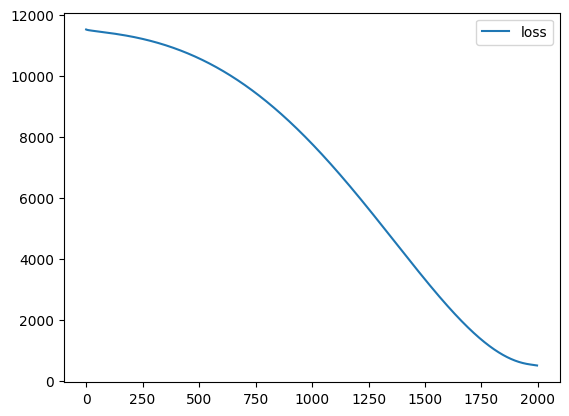

In [ ]:
ai_brain = Sequential([
    Dense(8,activation = 'relu',input_shape=[1]),
    Dense(10, activation = 'relu'),
    Dense(1)

])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(x_train1,y_train,epochs=1997)
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
x_test1=Scaler.transform(x_test)
ai_brain.evaluate(x_test1,y_test)
x_n1=[[19]]
x_n1_1=Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 979.5154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[144.53018]], dtype=float32)